# US ELECTION 2020 ANALYSIS

The United States (US) is the only country with a continuous democracy for more than 200 years. However, the US is more accurately defined as a constitutional republic. “Constitutional” refers to the fact that the government in the US is based on a Constitution, which is the supreme law of the US. The US elects its president every four years. The most recent election is the 2020 elections, which generated a lot of attention around the world. Although every citizen, who is eligible can vote, a presidential candidate needs 270 electoral college votes to win the presidency. There are two major parties in the US; Republican party and Democrat party. The current president, Donald Trump is a Republican, while his predecessor, Barack Obama is a Democrat.
A notable disaster in the 2020 elections is the polls. All the polls got it wrong! The goal of this project is to
1. analyse the US 2020 presidential elections
2. build a model that can predict the winner of the presidential race.

## DATASET USED

The data for the project is obtained from Kaggle https://www.kaggle.com/unanimad/us-election-2020. It contains county-level data from 2020 US Election, made of 11 files (i.e. comma separated values - csv).

In [3]:
#Import the needed libraries and packages

#Data manipulation and wrangling
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
def read_files(filename):
    """To read csv files using pandas
    Argument: filename or path to the file (i.e. relative or absolute)
    Return: pandas DataFrame
    """
    data = pd.read_csv(filename)
    return data


governor_data = read_files('US elections/Data/governors_county_candidate.csv')

Read all the needed datasets using the function above. The focus of the project will be on the two main parties in the election, thus Republicans and Democrats Party

In [118]:
president_data = read_files("US elections/Data/president_county_candidate.csv")
governor_data = read_files("US elections/Data/governors_county_candidate.csv")
senate_data = read_files("US elections/Data/senate_county_candidate.csv")
display(president_data.head(3))
display(governor_data.head(3))
display(senate_data.head(3))

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False


,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False


,state,county,candidate,party,total_votes
0,Delaware,Kent County,Lauren Witzke,REP,38571
1,Delaware,Kent County,Mark Turley,IPD,1553
2,Delaware,Kent County,Nadine Frost,LIB,958


Extract data for Democrats party from the president, governor and senate DataFrames

In [119]:
democrat_president_data = president_data[president_data.party=="DEM"]
democrat_governor_data = governor_data[governor_data.party=="DEM"]
democrat_senate_data = senate_data[senate_data.party=="DEM"]
display(democrat_president_data.head(2))
display(democrat_governor_data.head(2))
display(democrat_senate_data.head(2))

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
4,Delaware,New Castle County,John Carney,DEM,191678,True


,state,county,candidate,party,total_votes
6,Delaware,Sussex County,Christopher Coons,DEM,56137
9,Georgia,Appling County,Jon Ossoff,DEM,1753


In [90]:
dem_president_data= president_votes_by_state.groupby(["state","candidate","party","won"]).total_votes.sum().reset_index()
dem_president_state
dem_rep=dem_president_state[(dem_president_state.party=="REP")|(dem_president_state.party=="DEM")]
dem_rep.state.nunique()
dem_president_state

,state,candidate,party,won,total_votes
0,Alabama,Write-ins,WRI,False,7274
1,Alabama,Donald Trump,REP,False,205563
2,Alabama,Donald Trump,REP,True,1228596
3,Alabama,Jo Jorgensen,LIB,False,24994
4,Alabama,Joe Biden,DEM,False,533108
5,Alabama,Joe Biden,DEM,True,310365
6,Alaska,Brock Pierce,IND,False,821
7,Alaska,Don Blankenship,CST,False,1120
8,Alaska,Donald Trump,REP,False,64602
9,Alaska,Donald Trump,REP,True,124855


In [53]:
dem_rep

,state,candidate,party,won,total_votes
1,Alabama,Donald Trump,REP,False,205563
2,Alabama,Donald Trump,REP,True,1228596
4,Alabama,Joe Biden,DEM,False,533108
5,Alabama,Joe Biden,DEM,True,310365
8,Alaska,Donald Trump,REP,False,64602
9,Alaska,Donald Trump,REP,True,124855
12,Alaska,Joe Biden,DEM,False,67796
13,Alaska,Joe Biden,DEM,True,85755
16,Arizona,Donald Trump,REP,False,1248111
17,Arizona,Donald Trump,REP,True,413575


In [51]:
dem_rep_a=dem_rep.groupby(["state","candidate","party"]).total_votes.sum().reset_index()
dem_rep_a

,state,candidate,party,total_votes
0,Alabama,Donald Trump,REP,1434159
1,Alabama,Joe Biden,DEM,843473
2,Alaska,Donald Trump,REP,189457
3,Alaska,Joe Biden,DEM,153551
4,Arizona,Donald Trump,REP,1661686
5,Arizona,Joe Biden,DEM,1672143
6,Arkansas,Donald Trump,REP,759715
7,Arkansas,Joe Biden,DEM,423502
8,California,Donald Trump,REP,5890353
9,California,Joe Biden,DEM,10957378


In [58]:
democratic_party= dem_rep_a[(dem_rep_a.party=="DEM")]
democratic_party.state.count()

51

In [59]:
republican_party=dem_rep_a[(dem_rep_a.party=="REP")]
republican_party.count()

state          51
candidate      51
party          51
total_votes    51
dtype: int64

In [75]:
popular_votes= dem_rep_a.groupby(["candidate","party"]).total_votes.sum().reset_index()
popular_votes

,candidate,party,total_votes
0,Donald Trump,REP,74035377
1,Joe Biden,DEM,80413404


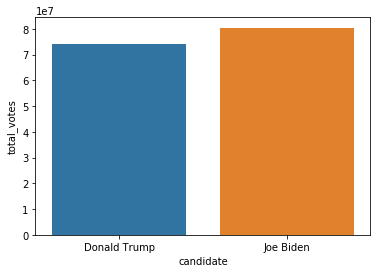

In [86]:
sns.barplot(x="candidate",y="total_votes",data=popular_votes)
plt.show()

In [92]:
popular_votes_all= dem_president_state.groupby(["candidate","party"]).total_votes.sum().reset_index()

In [112]:
elect = read_files("US elections/Data/Electoral_College.csv")
electoral_college_votes_2020 = elect[elect.Year==2020]
electoral_college_votes_2020.reset_index(drop=True,inplace=True)
electoral_college_votes_2020["electoral_votes"]=electoral_college_votes_2020["Votes"].astype(int)
electoral_college_votes_2020.drop(["Votes"],axis=1,inplace=True)
electoral_college_votes_2020

C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,State,electoral_votes
0,2020,Alabama,9
1,2020,Alaska,3
2,2020,Arizona,11
3,2020,Arkansas,6
4,2020,California,55
5,2020,Colorado,9
6,2020,Connecticut,7
7,2020,D.C.,3
8,2020,Delaware,3
9,2020,Florida,29
